In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [17]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [19]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 61,   2],
       [  1, 107]])

In [22]:
accuracy_score(y_test, y_pred)

0.9824561403508771

In [15]:
k_values = range(1, 50)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
print(accuracies)

[0.935672514619883, 0.9298245614035088, 0.9415204678362573, 0.9473684210526315, 0.9590643274853801, 0.9590643274853801, 0.9649122807017544, 0.9649122807017544, 0.9707602339181286, 0.9824561403508771, 0.9766081871345029, 0.9766081871345029, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9590643274853801, 0.9649122807017544, 0.9532163742690059, 0.9532163742690059, 0.9532163742690059, 0.9532163742690059, 0.9473684210526315, 0.9532163742690059, 0.9473684210526315, 0.9532163742690059, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.935672514619883, 0.9473684210526315, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9473684210526315, 0.9415204678362573, 0.9415204678362573, 0.935672514619883, 0.9415204678362573, 0.935672514619883, 0.935672514619883, 0.935672514619883, 0.9415204678362573, 0.935672514619883]


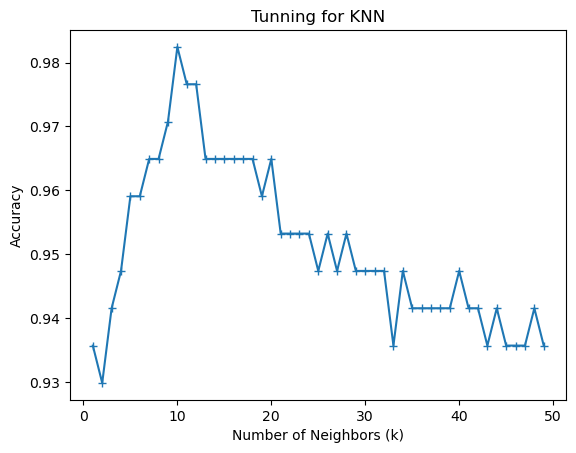

In [16]:
plt.plot(k_values, accuracies, marker='+')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Tunning for KNN')
plt.show()

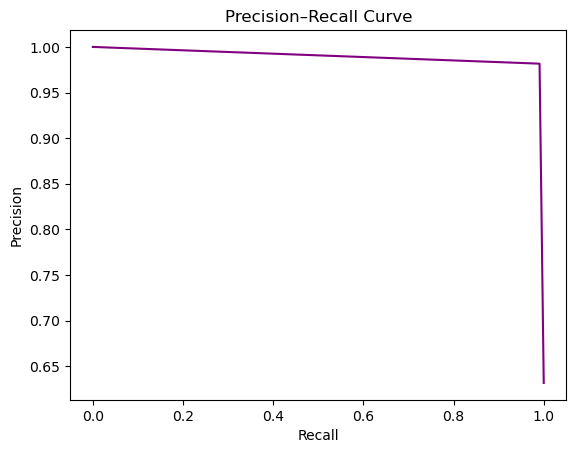

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision–Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()